In [1]:
import numpy as np
import matplotlib.pyplot as plt


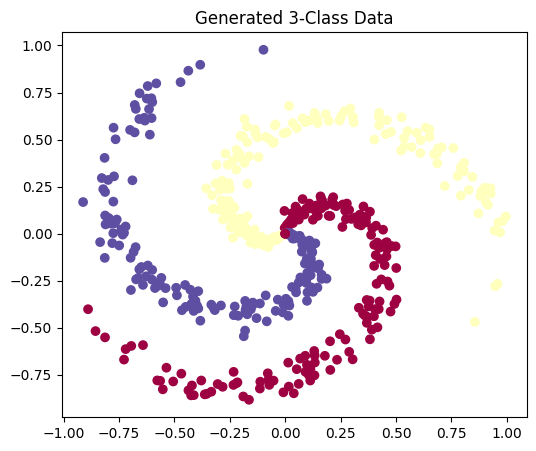

In [2]:
np.random.seed(0)

num_samples = 500
num_classes = 3
X = np.zeros((num_samples, 2))
Y = np.zeros((num_samples, num_classes))

for j in range(num_classes):
    ix = range(j * (num_samples // num_classes), (j + 1) * (num_samples // num_classes))
    radius = np.linspace(0.0, 1, num_samples // num_classes)
    theta = np.linspace(j * 4, (j + 1) * 4, num_samples // num_classes) + np.random.randn(num_samples // num_classes) * 0.2
    X[ix] = np.c_[radius * np.sin(theta), radius * np.cos(theta)]
    Y[ix, j] = 1  # one-hot encoding

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=np.argmax(Y, axis=1), cmap=plt.cm.Spectral)
plt.title("Generated 3-Class Data")
plt.show()


In [3]:
class NeuralNetwork:
    def __init__(self):
        # Layer sizes
        input_neurons = 2
        hidden1_neurons = 10
        hidden2_neurons = 8
        output_neurons = 3

        self.lr = 0.1  # learning rate

        # Weight initialization
        self.W1 = np.random.randn(input_neurons, hidden1_neurons)
        self.W2 = np.random.randn(hidden1_neurons, hidden2_neurons)
        self.W3 = np.random.randn(hidden2_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3)
        self.output = self.softmax(self.z3)
        return self.output

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        dW3 = self.a2.T.dot(output_error)

        hidden2_error = output_error.dot(self.W3.T) * self.sigmoid(self.a2, der=True)
        dW2 = self.a1.T.dot(hidden2_error)

        hidden1_error = hidden2_error.dot(self.W2.T) * self.sigmoid(self.a1, der=True)
        dW1 = X.T.dot(hidden1_error)

        # update weights (gradient ascent style)
        self.W3 += self.lr * dW3
        self.W2 += self.lr * dW2
        self.W1 += self.lr * dW1

    def train(self, X, Y, epochs=10000):
        loss = []
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss.append(np.mean(np.square(Y - pred)))
            if i % 1000 == 0:
                print(f"Epoch {i}, Loss: {loss[-1]:.4f}")
        return loss


In [4]:
NN = NeuralNetwork()
loss = NN.train(X, Y, epochs=10000)


Epoch 0, Loss: 0.2629
Epoch 1000, Loss: 0.1355
Epoch 2000, Loss: 0.1281
Epoch 3000, Loss: 0.1236
Epoch 4000, Loss: 0.1212
Epoch 5000, Loss: 0.1229
Epoch 6000, Loss: 0.1238
Epoch 7000, Loss: 0.1701
Epoch 8000, Loss: 0.1248
Epoch 9000, Loss: 0.1584


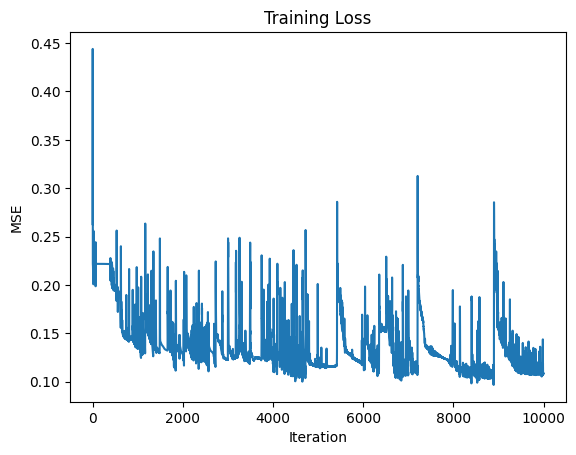

In [5]:
plt.figure()
plt.plot(loss)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()


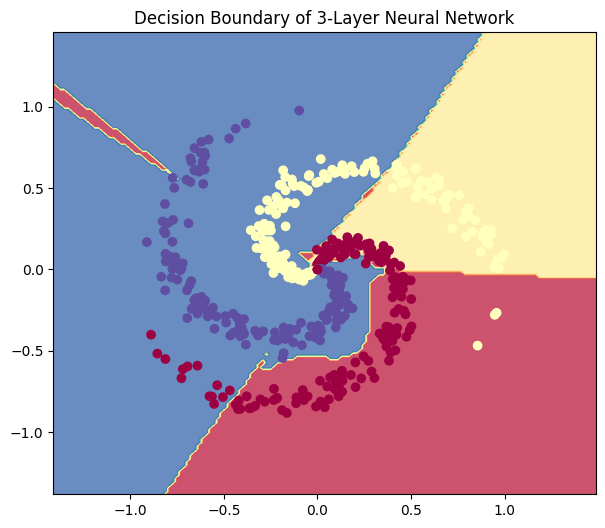

In [6]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=np.argmax(Y, axis=1), cmap=plt.cm.Spectral)
plt.title("Decision Boundary of 3-Layer Neural Network")
plt.show()

